<a href="https://colab.research.google.com/github/pyratlib/pyrat/blob/main/PyRAT_Basic_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyRAT example

This notebook has examples of using the library to extract metrics from tracking data. The data is stored on Zenodo (https://zenodo.org/record/5864324).

Sections <a name="manipulations"></a>:

1.   [Data manipulation](#manipulations)
2.   [Graphics and metrics](#graph)


For more details: https://github.com/pyratlib/pyrat

In [ ]:
#@title Installing PyRAT and downloading data.
!pip install pyratlib
!pip install wget
!pip install unrar
!git clone 
!wget https://zenodo.org/record/5883277/files/PyRAT_dataset.rar?download=1
!unrar x "/content/PyRAT_dataset.rar?download=1"

import pyratlib as rat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from IPython.display import clear_output 
import os

clear_output()

In [ ]:
#@title Load data

# Rato 1
df1_1 = pd.read_csv('/content/PyRAT_dataset/R1D1.csv')
df1_2 = pd.read_csv('/content/PyRAT_dataset/R1D2.csv')
df1_3 = pd.read_csv('/content/PyRAT_dataset/R1D3.csv')

# Rato 2
df2_1 = pd.read_csv('/content/PyRAT_dataset/R2D1.csv')
df2_2 = pd.read_csv('/content/PyRAT_dataset/R2D2.csv')
df2_3 = pd.read_csv('/content/PyRAT_dataset/R2D3.csv')

# Rato 3
df3_1 = pd.read_csv('/content/PyRAT_dataset/R3D1.csv')
df3_2 = pd.read_csv('/content/PyRAT_dataset/R3D2.csv')
df3_3 = pd.read_csv('/content/PyRAT_dataset/R3D3.csv')

# Rato 4
df4_1 = pd.read_csv('/content/PyRAT_dataset/R4D1.csv')
df4_2 = pd.read_csv('/content/PyRAT_dataset/R4D2.csv')
df4_3 = pd.read_csv('/content/PyRAT_dataset/R4D3.csv')

# Rato 5
df5_1 = pd.read_csv('/content/PyRAT_dataset/R5D1.csv')
df5_2 = pd.read_csv('/content/PyRAT_dataset/R5D2.csv')
df5_3 = pd.read_csv('/content/PyRAT_dataset/R5D3.csv')

# Rato 6
df6_1 = pd.read_csv('/content/PyRAT_dataset/R6D1.csv')
df6_2 = pd.read_csv('/content/PyRAT_dataset/R6D2.csv')
df6_3 = pd.read_csv('/content/PyRAT_dataset/R6D3.csv')

plx_tracking = pd.read_csv('/content/PyRAT_dataset/PlexonTracking.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Input data examples and manipulations <a name="manipulations"></a>

In [ ]:
#@title Input data example. This DataFrame is the output of DeepLabCut, without any changes
df1_3.head()

,scorer,DLC_resnet50_habituacaojan20shuffle1_100000,DLC_resnet50_habituacaojan20shuffle1_100000.1,DLC_resnet50_habituacaojan20shuffle1_100000.2,DLC_resnet50_habituacaojan20shuffle1_100000.3,DLC_resnet50_habituacaojan20shuffle1_100000.4,DLC_resnet50_habituacaojan20shuffle1_100000.5,DLC_resnet50_habituacaojan20shuffle1_100000.6,DLC_resnet50_habituacaojan20shuffle1_100000.7,DLC_resnet50_habituacaojan20shuffle1_100000.8,DLC_resnet50_habituacaojan20shuffle1_100000.9,DLC_resnet50_habituacaojan20shuffle1_100000.10,DLC_resnet50_habituacaojan20shuffle1_100000.11,DLC_resnet50_habituacaojan20shuffle1_100000.12,DLC_resnet50_habituacaojan20shuffle1_100000.13,DLC_resnet50_habituacaojan20shuffle1_100000.14,DLC_resnet50_habituacaojan20shuffle1_100000.15,DLC_resnet50_habituacaojan20shuffle1_100000.16,DLC_resnet50_habituacaojan20shuffle1_100000.17,DLC_resnet50_habituacaojan20shuffle1_100000.18,DLC_resnet50_habituacaojan20shuffle1_100000.19,DLC_resnet50_habituacaojan20shuffle1_100000.20,DLC_resnet50_habituacaojan20shuffle1_100000.21,DLC_resnet50_habituacaojan20shuffle1_100000.22,DLC_resnet50_habituacaojan20shuffle1_100000.23,DLC_resnet50_habituacaojan20shuffle1_100000.24,DLC_resnet50_habituacaojan20shuffle1_100000.25,DLC_resnet50_habituacaojan20shuffle1_100000.26,DLC_resnet50_habituacaojan20shuffle1_100000.27,DLC_resnet50_habituacaojan20shuffle1_100000.28,DLC_resnet50_habituacaojan20shuffle1_100000.29
0,bodyparts,nose,nose,nose,earL,earL,earL,earR,earR,earR,cervical,cervical,cervical,thoracic,thoracic,thoracic,lumbar,lumbar,lumbar,tailBase,tailBase,tailBase,tailProximal,tailProximal,tailProximal,tailMiddle,tailMiddle,tailMiddle,tailDistal,tailDistal,tailDistal
1,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
2,0,520.082275390625,231.89541625976562,0.9976109266281128,527.2606811523438,199.12098693847656,0.998888373374939,509.96875,214.42298889160156,0.999413251876831,508.1405029296875,195.73934936523438,0.9991479516029358,473.110107421875,176.05821228027344,0.9980566501617432,432.9101867675781,182.9668731689453,0.9992088079452515,394.87603759765625,193.32440185546875,0.9999485015869141,358.4897155761719,195.3096923828125,0.9990502595901489,317.69873046875,209.49038696289062,0.9993219971656799,325.8614501953125,240.9727783203125,0.9988898038864136
3,1,520.2313232421875,235.34381103515625,0.9987951517105103,528.5005493164062,203.25978088378906,0.9991916418075562,512.4299926757812,219.1097412109375,0.9980045557022095,509.2182922363281,199.8715057373047,0.9991306066513062,475.37921142578125,177.40748596191406,0.9993199110031128,434.4061279296875,181.97052001953125,0.9995826482772827,396.5166320800781,192.15789794921875,0.9999066591262817,361.6300354003906,194.36863708496094,0.9991640448570251,319.1687316894531,208.3808135986328,0.9991459846496582,327.3439025878906,241.08517456054688,0.99857097864151
4,2,518.5260009765625,239.5748748779297,0.9987322092056274,528.133056640625,207.1533203125,0.9993166923522949,512.3589477539062,222.4634246826172,0.9982194900512695,509.846435546875,203.17991638183594,0.9983409643173218,477.04168701171875,180.26980590820312,0.9994144439697266,437.5852355957031,180.273193359375,0.9997285008430481,397.6416931152344,189.4890594482422,0.999801754951477,366.6920471191406,192.08078002929688,0.9994860291481018,320.6714782714844,203.71786499023438,0.998073935508728,329.37152099609375,238.58999633789062,0.9976099729537964


In [ ]:
#@title If you have the bodyparts coordinates from other software (eg., Plexon) and want to use PyRAT, just default to DLC. Just add the necessary rows. 
plx_tracking.head()

,#,Timestamp,Frame_Number,X_pix,Y_pix,MM,EV1.1,EV1.1_Track_Length_pix,EV1.2,EV1.2_Track_Length_pix
0,1,0.033333,1,176.89,380.37,26,0,0.0,0,0.0
1,2,0.066666,2,176.79,380.18,14,0,0.0,0,0.0
2,3,0.099999,3,176.79,380.18,11,0,0.0,0,0.0
3,4,0.133332,4,176.92,379.79,13,0,0.0,0,0.0
4,5,0.166665,5,176.94,379.54,10,0,0.0,0,0.0


First adapt the original data (the "coords" column is not required for processing the data itself. It is removed within the PyRAT function, but is needed as a data structure and input for the functions to work well).

In [ ]:
plx = pd.DataFrame(plx_tracking[['Frame_Number','X_pix','Y_pix']].values, columns=['coords','Bodypart','Bodypart'])
plx.head()

,coords,Bodypart,Bodypart
0,1.0,176.89,380.37
1,2.0,176.79,380.18
2,3.0,176.79,380.18
3,4.0,176.92,379.79
4,5.0,176.94,379.54


In [ ]:
df_bp = pd.DataFrame([list([-1,'snout','snout']),list([0,'x','y'])], columns=['coords','Bodypart','Bodypart'])
df_example = pd.concat([df_bp, plx], ignore_index=True)
df_example.head()

,coords,Bodypart,Bodypart
0,-1.0,snout,snout
1,0.0,x,y
2,1.0,176.89,380.37
3,2.0,176.79,380.18
4,3.0,176.79,380.18


Using in a Function (more examples in the [Graph example](#graph))

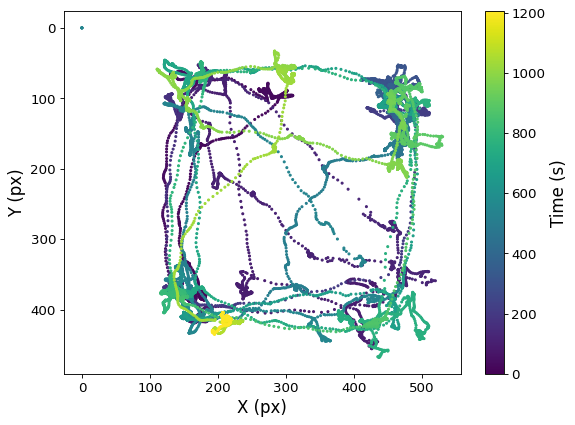

In [ ]:
rat.Trajectory(df_example, bodyPartTraj='snout', fontsize =15)
# the points in the coordinates (0,0) are measurement errors from the Plexon tracking system.

In case you want to use the functions in loop, the DataFrames must be stored inside a list

In [ ]:
data_day1 = [df1_1,df2_1,df3_1,df4_1,df5_1,df6_1]
data_day2 = [df1_2,df2_2,df3_2,df4_2,df5_2,df6_2]
data_day3 = [df1_3,df2_3,df3_3,df4_3,df5_3,df6_3]

if you want to plot all data at once (for trajectory or heatmap). DataFrames must be concatenated.

In [ ]:
day_1 = data_day1[0]
day_2 = data_day2[0]
day_3 = data_day3[0]

for i in range(1,len(data_day1)):
    day_1 = day_1.append(data_day1[i][2:],ignore_index=True)
    day_2 = day_2.append(data_day2[i][2:],ignore_index=True)
    day_3 = day_3.append(data_day3[i][2:],ignore_index=True)

In [ ]:
#@title Size of concatened data and single data
len(day_1),len(df1_1)

(217662, 36048)

## Graphics and metrics example <a name="graph"></a>

Trajectory(data, bodyPartTraj, bodyPartBox = None, **kwargs):

    Parameters
    ----------
    data : pandas DataFrame
        The input tracking data.
    bodyPartTraj : str
        Body part you want to plot the tracking.
    bodyPartBox : str
        The body part you want to use to estimate the limits of the environment, 
        usually the base of the tail is the most suitable for this determination.

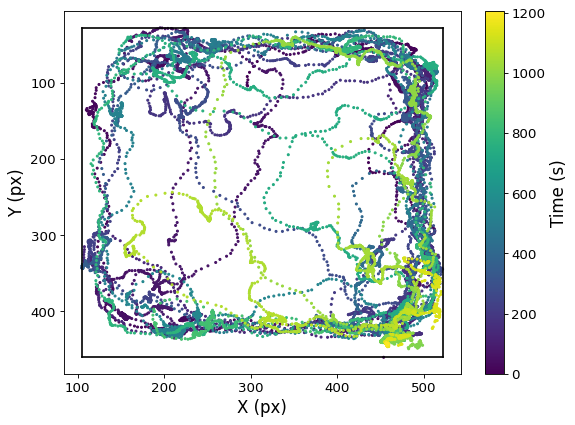

In [ ]:
rat.Trajectory(df3_1, bodyPartTraj='tailBase', bodyPartBox='tailBase', fontsize =15)
# the terms passed in the function in quotes must be the same as in the DataFrame (Input Examples section)

Heatmap(data, bodyPart, **kwargs):

    Parameters
    ----------
    data : pandas DataFrame
        The input tracking data.
    bodyPart : str
        Body part you want to plot the heatmap.
    cmapType : str, optional
        matplotlib colormap.
    hSize : int, optional
        Determine the figure height size (x).
    wSize : int, optional
        Determine the figure width size (y).
    bins : int, optional
        Determine the heatmap resolution, the higher the value, the higher the 
        resolution.
    vmax : int, optional
        Determine the heatmap scale.


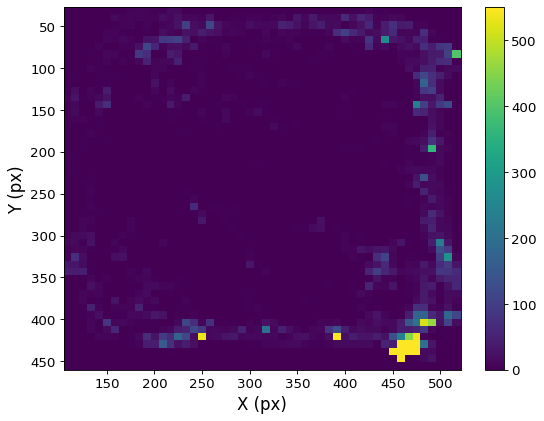

In [ ]:
rat.Heatmap(df3_1, bodyPart = "tailBase", cmapType = 'viridis', 
            hSize=6, wSize =8, bins = 50, fontsize=15, vmax= 550)
# the terms passed in the function in quotes must be the same as in the DataFrame (Input Examples section)

In [ ]:
#@title Rat distance
filter = .3

print('Rat - 3')
print('Distance:',"{:.2f}".format(rat.MotionMetrics(df3_1, "tailBase", filter=filter,  fps=30).Distance.sum()/100),'meters')
print('Distance:',"{:.2f}".format(rat.MotionMetrics(df3_2, "tailBase", filter=filter,  fps=30).Distance.sum()/100),'meters')
print('Distance:',"{:.2f}".format(rat.MotionMetrics(df3_3, "tailBase", filter=filter,  fps=30).Distance.sum()/100),'meters')

Rat - 3
Distance: 16.47 meters
Distance: 14.65 meters
Distance: 17.98 meters


HeadOrientation(data, step, head =  None, tail = None, **kwargs):

    Parameters
    ----------
    data : pandas DataFrame
        The input tracking data.
    step : int
        Step used in the data, will use a data point for each 'x' steps. The 
        smaller the step, the greater the amount of arrows and the more difficult 
        the interpretation.
    head : str
        Head coordinates to create the arrow. You can use data referring to another
        part of the body that you want to have as a reference for the line that will
        create the arrow. The angulation will be based on the arrow.
    tail : str
        Tail coordinates to create the arrow. You can use data referring to another
        part of the body that you want to have as a reference for the line that will
        create the arrow. The angulation will be based on the arrow.
    arrow_color : str, optional
        Determines the arrow color.

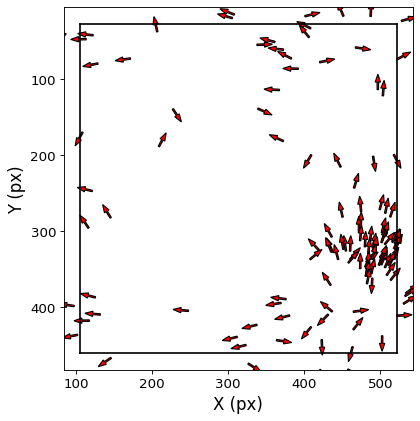

In [ ]:
rat.HeadOrientation(df3_1, step = 267, head = "nose", tail  = "tailBase", arrow_color = 'red')
# the terms passed in the function in quotes must be the same as in the DataFrame (Input Examples section)

Determining fields positions x and y (in pixels)

In [ ]:
area = {'rect1': [1,0  ,0  ,0 ,135,50,50,375],
        'rect2': [1,0  ,0  ,0 ,435,50,50,375]}

Creating the fields

FieldDetermination(Fields=1,plot=False,**kwargs):

    Parameters
    ----------
    posit : dict, optional
        A dictionary to pass objects with directions and not need to use input. It
        must contain a cache and 8 dice ('objt_type','center_x','center_y', 'radius',
        'a_x', 'a_y' , 'height', 'width'), 'obj_type' must be 0 or 1 (0 = circle and 
        1 = rectangle). An example of this dictionary is in Section examples.
    plot : bool, optional
        Plot of objects created for ease of use. If you have difficulty in positioning 
        the areas, this parameter will plot the graph where the areas were positioned. 
        It needs to receive the DataFrame of the data and the part of the body that will
        be used to determine the limits of the environment (usually the tail).
    data : pandas DataFrame, optional
        The input tracking data.
    bodyPartBox : str, optional
        The body part you want to use to estimate the limits of the environment, 
        usually the base of the tail is the most suitable for this determination.

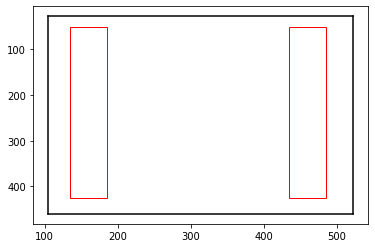

In [ ]:
obj = rat.FieldDetermination(posit = area,plot=True,data=df3_1,bodyPartBox='tailBase')
rat_code = ['R1D1','R2D1','R3D1','R4D1','R5D1','R6D1']
# the terms passed in the function in quotes must be the same as in the DataFrame (Input Examples section)

Calculating the animal interaction with each field created.

PlotInteraction(interactions, **kwargs)

    Parameters
    ----------
    data : pandas DataFrame
        The input tracking data.
    bodyPart : str
        Body part you want use as reference.
    fields : pandas DataFrame
        The DataFrame with the coordinates of the created fields (output of FieldDetermination()).

In [ ]:
interactions,_ = rat.Interaction(df3_1,'nose',obj)
interactions.T
# the terms passed in the function in quotes must be the same as in the DataFrame (Input Examples section)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518
start,0,0.133333,0.433333,7.8,8.4,10.3,10.6333,11.5333,11.9333,15.1,15.5333,19.5333,19.7667,20.2,20.4667,20.7,21.1,25.5667,25.6,25.7667,25.8,30.9667,31.2333,31.4667,31.7333,34.9,35.2333,37.4667,37.8333,38.1,38.3,38.7,39.0667,39.9333,40.2333,45.5,45.9,53.7,54.2333,64.2333,...,1025.53,1025.7,1027.13,1027.77,1028.17,1028.87,1036.97,1037.07,1053.93,1054.2,1058.3,1058.67,1062.63,1062.8,1066.9,1067,1070.53,1071.07,1077.23,1077.7,1080.3,1080.33,1080.6,1082.53,1098.13,1098.37,1103.97,1104.83,1105.9,1113.2,1113.4,1113.47,1113.83,1124.93,1126.63,1126.73,1140.7,1141.27,1166.63,1166.87
end,0.133333,0.433333,7.8,8.4,10.3,10.6333,11.5333,11.9333,15.1,15.5333,19.5333,19.7667,20.2,20.4667,20.7,21.1,25.5667,25.6,25.7667,25.8,30.9667,31.2333,31.4667,31.7333,34.9,35.2333,37.4667,37.8333,38.1,38.3,38.7,39.0667,39.9333,40.2333,45.5,45.9,53.7,54.2333,64.2333,64.8,...,1025.7,1027.13,1027.77,1028.17,1028.87,1036.97,1037.07,1053.93,1054.2,1058.3,1058.67,1062.63,1062.8,1066.9,1067,1070.53,1071.07,1077.23,1077.7,1080.3,1080.33,1080.6,1082.53,1098.13,1098.37,1103.97,1104.83,1105.9,1113.2,1113.4,1113.47,1113.83,1124.93,1126.63,1126.73,1140.7,1141.27,1166.63,1166.87,1204.3
obj,0,2,0,2,0,2,0,2,0,1,0,1,0,1,0,1,0,1,0,1,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,1,0,1,0,1,...,2,0,2,0,2,0,2,0,1,0,1,0,1,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0,2,0


Interactions plot

PlotInteraction(interactions, **kwargs):
```
Parameters
----------
  interactions : pandas DataFrame
      The DataFrame with the interactions of the fields (output of Interaction()). 


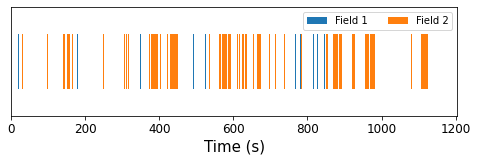

In [ ]:
rat.PlotInteraction(interactions)

Metrics os each animal using Reports

Reports(df_list,list_name,bodypart,fields=None,filter=0.3,fps=30):

```
Parameters
----------
    df_list : list
        List with all DataFrames.
    list_name : list
        List with names of each data.
    bodypart : str
        Body part you want use as reference.
    fields : pandas DataFrame
        The DataFrame with the coordinates of the created fields (output of FieldDetermination()).   
    filter : float
        Threshold to remove motion artifacts. Adjust according to the tracking 
        quality and speed of what is moving.
    fps : int
        The recording frames per second.
```

In [ ]:
df_report = rat.Reports(data_day1,list_name = rat_code,bodypart='nose',fields=obj)
df_report

,file,video time (min),dist (cm),speed (cm/s),field_1,time_field_1,field_2,time_field_2
0,R1D1,20.025000,2518.335994,2.095993,62.0,41.100000,197.0,126.866667
1,R2D1,20.741111,2629.041241,2.112585,97.0,74.100000,170.0,109.033333
2,R3D1,20.071667,2334.205607,1.938226,65.0,33.666667,194.0,253.066667
3,R4D1,20.020556,2449.761944,2.039372,94.0,44.433333,180.0,214.600000
4,R5D1,20.021111,2015.411763,1.677739,49.0,21.933333,303.0,263.500000
5,R6D1,20.039444,1699.114416,1.413142,17.0,10.933333,76.0,187.233333


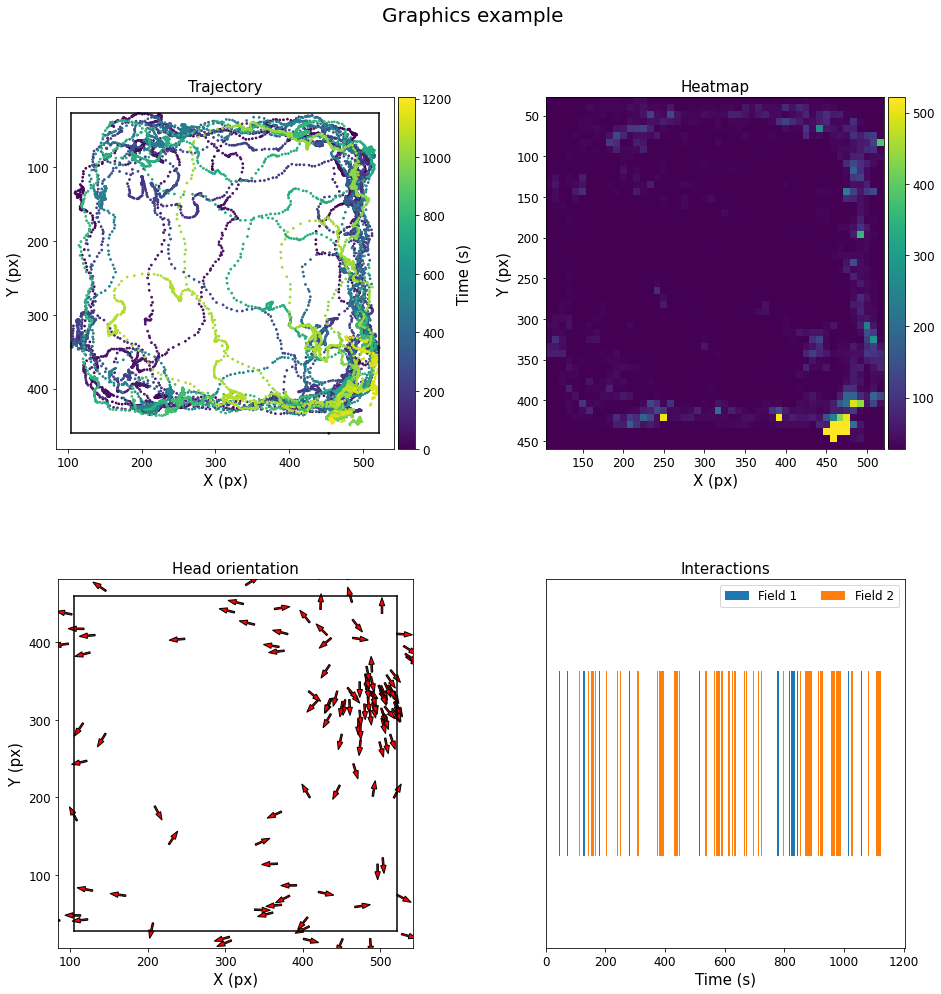

In [ ]:
#@title Plot example
fig, axs = plt.subplots( 2, 2,figsize=(15,15))
fig.tight_layout(pad = 10)

fig.suptitle('Graphics example', fontsize = 20)
rat.Trajectory(df3_1, bodyPartTraj='tailBase', bodyPartBox='tailBase', fontsize =15, fig=fig, ax = axs[0][0], figureTitle = 'Trajectory')
rat.Heatmap(df3_1, "tailBase", cmapType = 'viridis', figureTitle = 'Heatmap', hSize=6, wSize =8, bins = 50, fontsize=15, vmax= 550,fig=fig, ax=axs[0][1])
rat.HeadOrientation(df3_1, 267, "nose", "tailBase", arrow_color = 'red', invertY = False,figureTitle = 'Head orientation', fig=fig, ax=axs[1][0])
rat.PlotInteraction(interactions, fig=fig, ax =axs[1][1],figureTitle = 'Interactions')